In [1]:
import msprime
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def segregating_sites_examples(num_replicates):
    """
    Runs num_replicates simulations, each one generating a very small number of SNPs. All these mutations are
    pooled in order get thousands of independent SNPs.
    """
    s = 0
    replicates = msprime.simulate(Ne=15000, length= 1e2, sample_size=100,
                                  mutation_rate=1e-8, recombination_rate=1e-8,
                                  num_replicates=num_replicates)
    for j, ts in enumerate(replicates):
        h = np.zeros((ts.get_num_mutations(), int(ts.get_sample_size()/2), 2),
             dtype=np.int8)
        for variant in ts.variants():
            h[variant.index] = np.reshape(variant.genotypes , (50,2))
        if s==0:
            haplotypes = h
        else:
            haplotypes = np.concatenate((haplotypes, h), axis=0)
        s += ts.get_num_mutations()
    return(haplotypes)

In [3]:
g = allel.model.GenotypeArray(segregating_sites_examples(10000))
g

<GenotypeArray shape=(3175, 50, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 1/1 1/1 0/1 0/0 ... 0/0 0/0 1/0 0/0 0/0
0/0 0/0 0/1 0/0 0/0 ... 0/0 0/1 0/0 0/0 0/0
...
0/0 0/1 0/0 0/0 0/1 ... 0/0 0/0 0/0 0/1 0/0
0/0 0/0 0/0 0/0 1/0 ... 0/0 0/0 0/0 0/0 0/0
0/1 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [4]:
gn = g.to_n_alt()[:]
g[0,0] = -1

# PCA
coords, model = allel.stats.pca(gn, scaler=None)

In [5]:
g.is_missing()

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [6]:
def plot_pca_coords(coords, model, pc1, pc2, ax):
    x = coords[:, pc1]
    y = coords[:, pc2]
    ax.plot(x, y, marker='o', linestyle=' ', markersize=8, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))

fig, ax = plt.subplots(figsize=(6, 6))
sns.despine(ax=ax, offset=10)
plot_pca_coords(coords, model, 0, 1, ax)

Text(0.5,1.02,'PC maps')

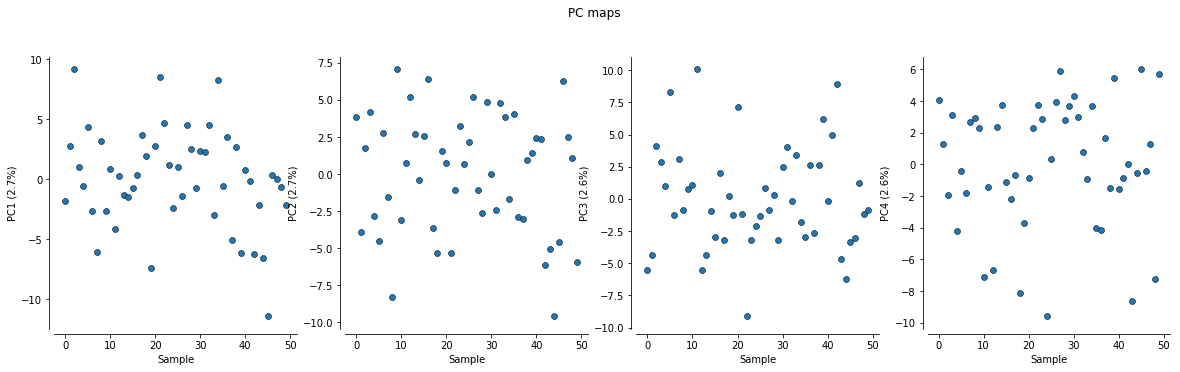

In [7]:
def plot_PC_maps(coords, model, pc, ax):
    """
    Plots each PC element against the sample number.
    """
    sns.despine(ax=ax, offset=5)
    y = coords[:, pc]
    x = np.arange(len(y))
    ax.plot(x, y, marker='o', linestyle=' ', markersize=6, mec='k', mew=.5)
    ax.set_ylabel('PC%s (%.1f%%)' % (pc+1, model.explained_variance_ratio_[pc]*100))
    ax.set_xlabel('Sample')
    
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,4,1)
plot_PC_maps(coords, model, 0, ax)
ax = fig.add_subplot(1,4,2)
plot_PC_maps(coords, model, 1, ax)
ax = fig.add_subplot(1,4,3)
plot_PC_maps(coords, model, 2, ax)
ax = fig.add_subplot(1,4,4)
plot_PC_maps(coords, model, 3, ax)
fig.suptitle('PC maps', y=1.02)